# 1. Train, test dataset load

In [0]:
import numpy as np

In [0]:
#파일 열어 데이터 로드, list로 X,y값을 각 저장 
import csv
X_train = []
y_train = []

X_test = []
y_test = []

with open('data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        #print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        X_train.append([float(i[0]),float(i[1]),float(i[2])])
        y_train.append([float(i[3])])
        ct += 1

with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        #print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        X_test.append([float(i[0]),float(i[1]),float(i[2])])
        y_test.append([float(i[3])])
        ct += 1


In [0]:
X_train = np.array(X_train)
y_train = np.array(y_train)
m_train = y_train.size

X_test = np.array(X_test)
y_test = np.array(y_test)
m_test = y_test.size

In [0]:
#X에는 1을 가지는 열을 삽입한다. (interception계산위함 )
X_train = np.insert(X_train,0,1,axis=1)
X_test = np.insert(X_test,0,1,axis=1)

In [41]:
print(X_train.shape,X_test.shape,m_train) #데이터 shape확인 

(300, 4) (300, 4) 300


# 2. Gradient descent
- overflow runtimeError -> loss값이 발산해서 그렇다. alpha값 조정한다. 

In [0]:
# X벡터값과 theta값을 받았을 때, 도출할 수 있는 linear model
def h(theta,X):
  return np.dot(X,theta)

In [0]:
# Objective function
def ObjectiveFunction(theta, X, y,m):
  return float((1./(2*m)) * np.dot((h(theta,X)-y).T,(h(theta,X)-y)))

In [0]:
# Gradient descent using Objective function
iteration = 100000 # hyperparameter
alpha = 0.00003

def GradientDescent(X,y,theta,m):
    #plotting위해 저장하는 history
    J_history = [] 
    theta_history = []

    #iteration
    for i in range(iteration):
        tmp = theta #동시에 update하기 위해선 교환하기 위한 새로운 변수가 필요
        
        J_history.append(ObjectiveFunction(theta,X,y,m))
        theta_history.append(list(theta[:,0]))

        #update theta
        for j in range(len(tmp)):
            tmp[j] = theta[j] - (alpha/m)*np.sum((h(theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        theta = tmp 
    return theta, theta_history, J_history

In [91]:
# theta초깃값 지정
theta = np.array([[0.001],[0.001],[0.001],[0.001]])
theta

array([[0.001],
       [0.001],
       [0.001],
       [0.001]])

In [0]:
# compute Gradient descent
theta, theta_history, J_history = GradientDescent(X_train,y_train,theta,m_train)

In [93]:
theta

array([[-0.62657002],
       [ 0.79507448],
       [-1.79777611],
       [ 4.0063242 ]])

In [94]:
J_history[-1] #cost값 10개만 확인

103.4936226142058

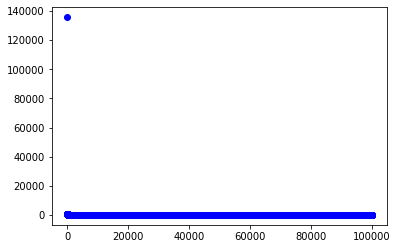

In [95]:
#plot the cost function
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(len(J_history)),J_history,'bo')

In [0]:
theta0_history = [] 
theta1_history = []
theta2_history = []
theta3_history = []

for i in range(len(theta_history)):
  theta0_history.append(theta_history[i][0])
  theta1_history.append(theta_history[i][1])
  theta2_history.append(theta_history[i][2])
  theta3_history.append(theta_history[i][3])

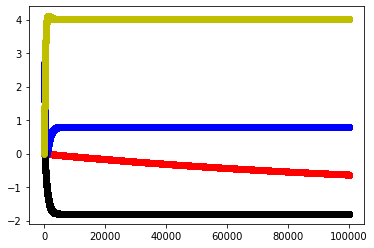

In [96]:
#plotting each parameter(theta0, theta1)
# 주의할 점은 각 theta별로 분리해서 plotting 해줘야 한다는 점. 
plt.plot(theta0_history,'ro') #theta0 값
plt.plot(theta1_history,'bo') #theta1 값
plt.plot(theta2_history,'ko') #theta2 값
plt.plot(theta3_history,'yo') #theta3 값

# 3. Plotting the testing error
- train set으로 학습시켰던 theta값들을 적용하고 X_train값만을 train을 사용하는 경우
- theta값을 그대로 적용하되 X_test, y_test만 바꿔서 새로운 cost값을 생성해야 한다. 

In [0]:
cost_test=[]
for i in range(iteration):
  theta = np.transpose(np.array([theta_history[i]]))
  cost_test.append(ObjectiveFunction(theta,X_test,y_test,m_test))

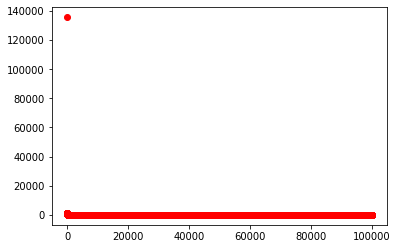

In [90]:
#plotting the cost function of test data along iteration
plt.plot(range(len(cost_test)),cost_test,'ro')